# Optimizing delivery with Reinforcement Learning

![](http://img.chefdentreprise.com/Img/BREVE/2018/3/328332/recette-nestor-atteindre-rentabilite-F.jpg)

In [14]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Environment definition
As for any RL problem, an environment must be designed where the Agent will evolve.<br>
For convenience and readability, we will define it like OpenAI Gym environments

In [15]:
from delivery import *

Initialized Delivery Environment with 10 random stops
Target metric for optimization is distance


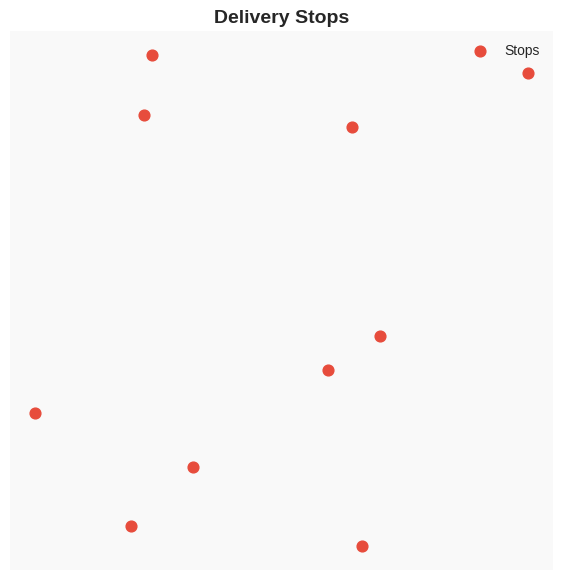

In [16]:
env = DeliveryEnvironment(n_stops = 10)

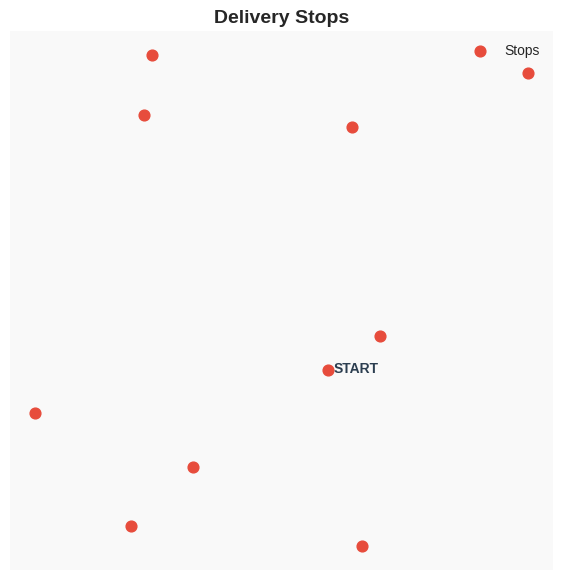

In [17]:
env.render()

In [18]:
env.stops

[5]

In [19]:
for i in [0,1,2,3]:
    env.step(i)

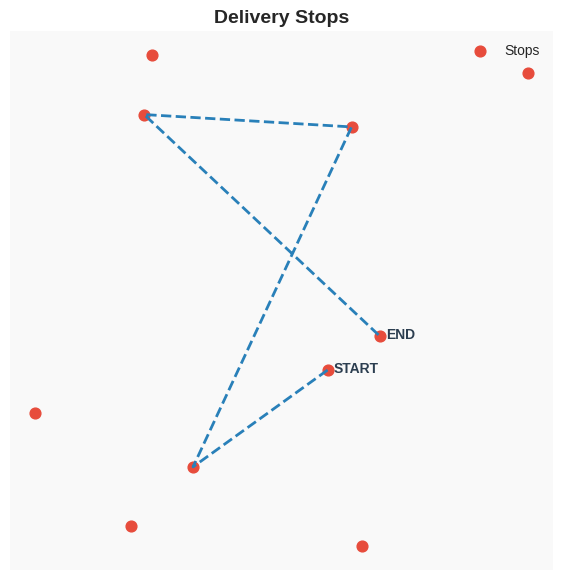

In [20]:
env.render()

# Q Learning

In [21]:
import sys
sys.path.append("../")

from delivery import run_episode,DeliveryQAgent,run_n_episodes

## Simple case

Initialized Delivery Environment with 100 random stops
Target metric for optimization is distance


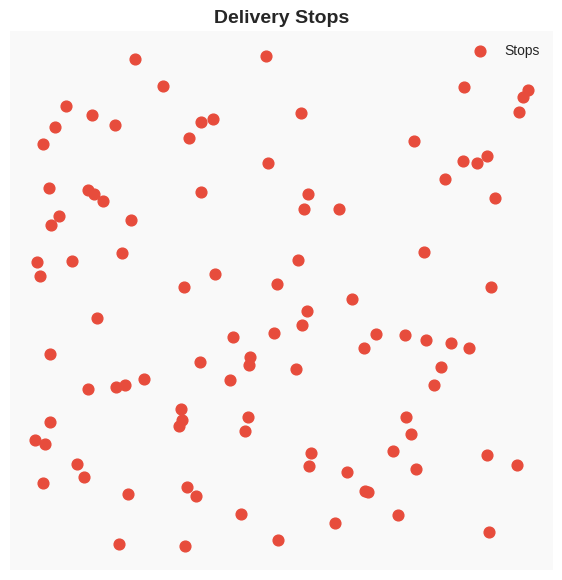

In [22]:
env = DeliveryEnvironment(n_stops = 100,method = "distance")

In [23]:
agent = DeliveryQAgent(env.observation_space,env.action_space)

  0%|          | 0/1000 [00:00<?, ?it/s]

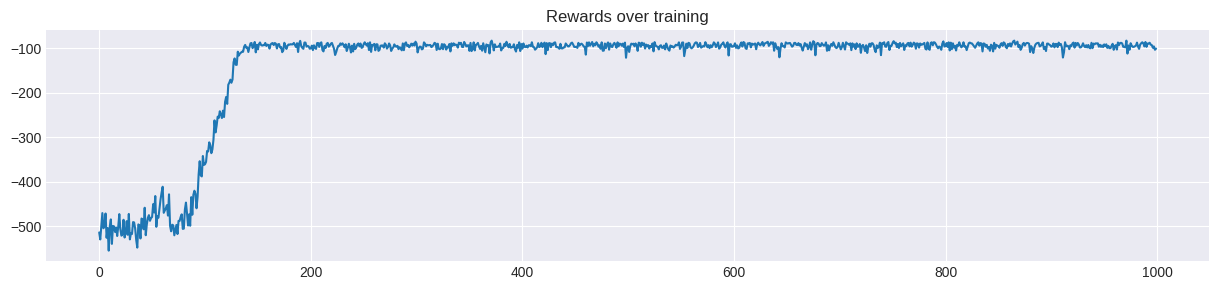

(<delivery.DeliveryEnvironment at 0x7d801eb93d30>,
 <delivery.DeliveryQAgent at 0x7d801f2569b0>)

In [24]:
run_n_episodes(env,agent,"training_100_stops.gif")

In [25]:
# Sel baru di notebook Anda, setelah pelatihan

print("="*50)
print("             ANALISIS HASIL AKHIR PELATIHAN")
print("="*50)

# 1. EKSTRAK RUTE: Ambil urutan kunjungan dari episode terakhir.
# Ini adalah solusi TSP yang ditemukan oleh agen.
optimal_route = trained_env.stops
print(f"\nRute efisien yang ditemukan (urutan kunjungan titik):")
print(" -> ".join(map(str, optimal_route)))

# 2. HITUNG JARAK: Hitung total jarak dari rute yang ditemukan.
# Angka ini yang akan Anda bandingkan dengan metode lain.
total_distance = 0
for i in range(len(optimal_route) - 1):
    start_node = optimal_route[i]
    end_node = optimal_route[i+1]
    # Ambil jarak dari matriks jarak yang sudah ada di environment
    distance = trained_env.distance_matrix[start_node, end_node]
    total_distance += distance

print(f"\nTotal Jarak dari Rute Ini: {total_distance:.2f}")

# 3. VISUALISASIKAN RUTE: Panggil render() sekali lagi pada environment
# yang sudah dalam keadaan final untuk menggambar rute terbaiknya.
print("\nVisualisasi Rute Efisien yang Ditemukan:")
trained_env.render()

             ANALISIS HASIL AKHIR PELATIHAN


NameError: name 'trained_env' is not defined

## Traffic case

Initialized Delivery Environment with 100 random stops
Target metric for optimization is traffic_box


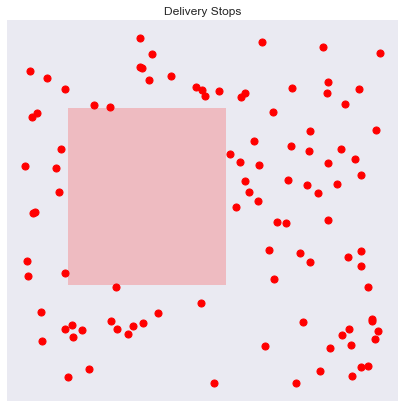

In [24]:
env = DeliveryEnvironment(n_stops = 100,method = "traffic_box",box_size = 0.6,traffic_intensity = 100)

In [25]:
agent = DeliveryQAgent(env.observation_space,env.action_space)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

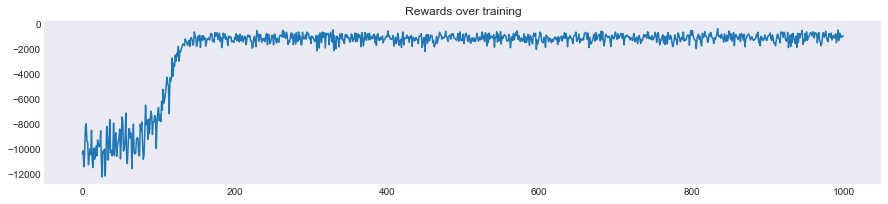

(<delivery.DeliveryEnvironment at 0x176d60a0da0>,
 <delivery.DeliveryQAgent at 0x176d7660898>)

In [26]:
run_n_episodes(env,agent,"training_100_stops_traffic.gif")